In [1]:
import numpy as np
import numpy.random as random
from sklearn.utils import murmurhash3_32 as mmh3
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
urls = ['google.com', 'https://yahoo.com/', 'https://bloomberg.com/']

In [3]:
vocab = ['apple', 'strawberry', 'orange', 'juice', 'drink', 'smoothie',
         'eat', 'fruit', 'health', 'wellness', 'steak', 'fries', 'ketchup',
         'burger', 'chips', 'lobster', 'caviar', 'service', 'waiter', 'chef']

In [4]:
hashes1 = [mmh3(w, 1) % 15 for w in vocab]
hashes1

[3, 6, 4, 13, 8, 3, 13, 1, 9, 12, 11, 4, 2, 13, 5, 10, 0, 2, 10, 13]

In [5]:
# mapped vacabs
dict(zip(vocab, hashes1))

{'apple': 3,
 'strawberry': 6,
 'orange': 4,
 'juice': 13,
 'drink': 8,
 'smoothie': 3,
 'eat': 13,
 'fruit': 1,
 'health': 9,
 'wellness': 12,
 'steak': 11,
 'fries': 4,
 'ketchup': 2,
 'burger': 13,
 'chips': 5,
 'lobster': 10,
 'caviar': 0,
 'service': 2,
 'waiter': 10,
 'chef': 13}

In [6]:
# some shared keys. 
# Key 13 is shared 4 times , while 7 is unassigned. 
unique, counts = np.unique(hashes1, return_counts=True)
np.asarray((unique, counts)).T

# So if multiple words have same keys they will map to the same vector, i.e the model will not recognise  

array([[ 0,  1],
       [ 1,  1],
       [ 2,  2],
       [ 3,  2],
       [ 4,  2],
       [ 5,  1],
       [ 6,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  2],
       [11,  1],
       [12,  1],
       [13,  4]])

In [7]:
# Hash the words again with a different seed. 
hashes2 = [mmh3(w, 2) % 15 for w in vocab]

# here 3 are unassigned 
len(set(hashes2))
# Counter(hashes2)

12

In [22]:
random.seed(0)

nb_epoch = 10
learn_rate = 0.1
nr_hash_vector = 15

words = [str(i) for i in range(20)]
true_vectors = np.random.uniform(-0.1, 0.1, (len(words), 2))
hash_vectors = np.random.uniform(-0.1, 0.1, (nr_hash_vector, 2))
examples = list(zip(words, true_vectors))

losses = []
for epoch in range(nb_epoch):
    random.shuffle(examples)
    loss=0.
    for word, truth in examples:
        key1 = mmh3(word, 1) % nr_hash_vector
        key2 = mmh3(word, 2) % nr_hash_vector

        hash_vector = hash_vectors[key1] + hash_vectors[key2]

        diff = hash_vector - truth

        hash_vectors[key1] -= learn_rate * diff
        hash_vectors[key2] -= learn_rate * diff
        loss += (diff**2).sum()
        losses.append(loss)

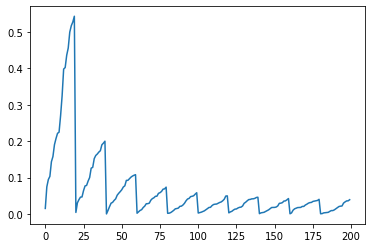

In [23]:
plt.plot(losses)